In [1]:
# Commented out IPython magic to ensure Python compatibility.
import numpy as np
import pandas as pd
#import sklearn as sl
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import os
# %matplotlib inline

os.listdir()
%cd C:\Users\KESHANI\Documents\Python Scripts\FDM Project

os.listdir()
#import data
df = pd.read_csv('googleplaystore.csv')

df

C:\Users\KESHANI\Documents\Python Scripts\FDM Project


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [2]:
df = df.drop(["App","Current Ver"],1)
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4.0.3 and up
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",4.2 and up
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...
10836,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",4.1 and up
10837,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",4.1 and up
10838,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",2.2 and up
10839,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device


In [3]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4.0.3 and up
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",4.2 and up
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...
10836,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",4.1 and up
10837,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",4.1 and up
10838,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",2.2 and up
10839,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device


In [4]:
#delete Type,Content Rating
df_train = df.copy()
for i in ['Type','Content Rating','Android Ver']:
    df_train = df_train.drop(df_train.loc[df_train[i].isnull()].index,0)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10837 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10837 non-null  object 
 1   Rating          9364 non-null   float64
 2   Reviews         10837 non-null  object 
 3   Size            10837 non-null  object 
 4   Installs        10837 non-null  object 
 5   Type            10837 non-null  object 
 6   Price           10837 non-null  object 
 7   Content Rating  10837 non-null  object 
 8   Genres          10837 non-null  object 
 9   Last Updated    10837 non-null  object 
 10  Android Ver     10837 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1016.0+ KB


In [5]:
#fill rating null values with mean quartiles
x = sum(df_train.Rating.describe()[4:8])/4
df_train.Rating = df_train.Rating.fillna(x)
print("Dataset contains ",df_train.isna().any().sum()," Nan values.")

Dataset contains  0  Nan values.


In [6]:
#df_train = df_train[df_train["Rating"]<=5]
#print(df_train)

In [7]:
#from sklearn.preprocessing import LabelEncoder
#transform 'Category' column
#le=LabelEncoder()
#df_train['Category']=le.fit(df_train['Category']).transform(df_train['Category'])

from sklearn.preprocessing import OneHotEncoder


# In[33]:


encode = OneHotEncoder()

data_encoded = encode.fit(df_train[['Category','Genres']]).transform(df_train[['Category','Genres']])
temp = pd.DataFrame(data_encoded.toarray(),columns=encode.get_feature_names())

df_train = pd.concat([temp, df_train[['Rating', 'Reviews', 'Size', 'Installs', 'Type',
                                    'Price', 'Content Rating', 'Last Updated', 'Android Ver']]], axis = 1, join = 'inner')

In [8]:
print(df_train)

       x0_ART_AND_DESIGN  x0_AUTO_AND_VEHICLES  x0_BEAUTY  \
0                    1.0                   0.0        0.0   
1                    1.0                   0.0        0.0   
2                    1.0                   0.0        0.0   
3                    1.0                   0.0        0.0   
4                    1.0                   0.0        0.0   
...                  ...                   ...        ...   
10832                0.0                   0.0        0.0   
10833                0.0                   0.0        0.0   
10834                0.0                   0.0        0.0   
10835                0.0                   0.0        0.0   
10836                0.0                   0.0        0.0   

       x0_BOOKS_AND_REFERENCE  x0_BUSINESS  x0_COMICS  x0_COMMUNICATION  \
0                         0.0          0.0        0.0               0.0   
1                         0.0          0.0        0.0               0.0   
2                         0.0          0.0

In [9]:
# lists = []
# for i in df_dummy.Genres.value_counts().index:
#    if df_dummy.Genres.value_counts()[i]<20:
#         lists.append(i)

# print(len(lists)," genres contains too few (<20) sample")
# df_dummy.Genres = ['Other' if i in lists else i for i in df_dummy.Genres] 

In [10]:
#Transform 'Genres' column
#df_train['Genres']=le.fit(df_train['Genres']).transform(df_train['Genres'])
#print(df_train)

In [11]:
df_train['Content Rating'] = df_train['Content Rating'].map({'Unrated':0.0,
                                                 'Everyone':1.0,
                                                 'Everyone 10+':2.0,
                                                 'Teen':3.0,
                                                 'Adults only 18+':4.0,
                                                 'Mature 17+':5.0})
df_train['Content Rating'] = df_train['Content Rating'].astype(float)
df_train.head()

,x0_ART_AND_DESIGN,x0_AUTO_AND_VEHICLES,x0_BEAUTY,x0_BOOKS_AND_REFERENCE,x0_BUSINESS,x0_COMICS,x0_COMMUNICATION,x0_DATING,x0_EDUCATION,x0_ENTERTAINMENT,...,x1_Word,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.1,159,19M,"10,000+",Free,0,1.0,"January 7, 2018",4.0.3 and up
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.9,967,14M,"500,000+",Free,0,1.0,"January 15, 2018",4.0.3 and up
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.7,87510,8.7M,"5,000,000+",Free,0,1.0,"August 1, 2018",4.0.3 and up
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,215644,25M,"50,000,000+",Free,0,3.0,"June 8, 2018",4.2 and up
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.3,967,2.8M,"100,000+",Free,0,1.0,"June 20, 2018",4.4 and up


In [12]:
#change type to float for Review


df_train['Reviews'] = df_train['Reviews'].astype(float)
print(df_train)

       x0_ART_AND_DESIGN  x0_AUTO_AND_VEHICLES  x0_BEAUTY  \
0                    1.0                   0.0        0.0   
1                    1.0                   0.0        0.0   
2                    1.0                   0.0        0.0   
3                    1.0                   0.0        0.0   
4                    1.0                   0.0        0.0   
...                  ...                   ...        ...   
10832                0.0                   0.0        0.0   
10833                0.0                   0.0        0.0   
10834                0.0                   0.0        0.0   
10835                0.0                   0.0        0.0   
10836                0.0                   0.0        0.0   

       x0_BOOKS_AND_REFERENCE  x0_BUSINESS  x0_COMICS  x0_COMMUNICATION  \
0                         0.0          0.0        0.0               0.0   
1                         0.0          0.0        0.0               0.0   
2                         0.0          0.0

In [13]:
#clean 'M','k', fill 'Varies with device' with median and transform to float 
lists = []
for i in df_train["Size"]:
    if 'M' in i:
        i = float(i.replace('M',''))
        i = i*1000000
        lists.append(i)
    elif 'k' in i:
        i = float(i.replace('k',''))
        i = i*1000
        lists.append(i)
    else:
        lists.append("Unknown")
    
k = pd.Series(lists)
median = k[k!="Unknown"].median()
k = [median if i=="Unknown" else i for i in k]
df_train["Size"] = k

del k,median,lists
print(df_train)

       x0_ART_AND_DESIGN  x0_AUTO_AND_VEHICLES  x0_BEAUTY  \
0                    1.0                   0.0        0.0   
1                    1.0                   0.0        0.0   
2                    1.0                   0.0        0.0   
3                    1.0                   0.0        0.0   
4                    1.0                   0.0        0.0   
...                  ...                   ...        ...   
10832                0.0                   0.0        0.0   
10833                0.0                   0.0        0.0   
10834                0.0                   0.0        0.0   
10835                0.0                   0.0        0.0   
10836                0.0                   0.0        0.0   

       x0_BOOKS_AND_REFERENCE  x0_BUSINESS  x0_COMICS  x0_COMMUNICATION  \
0                         0.0          0.0        0.0               0.0   
1                         0.0          0.0        0.0               0.0   
2                         0.0          0.0

In [14]:
#clean '$' in Price and transform to float 
df_train['Price'] = [ float(i.split('$')[1]) if '$' in i else float(0) for i in df_train['Price'] ]
print(df_train)

       x0_ART_AND_DESIGN  x0_AUTO_AND_VEHICLES  x0_BEAUTY  \
0                    1.0                   0.0        0.0   
1                    1.0                   0.0        0.0   
2                    1.0                   0.0        0.0   
3                    1.0                   0.0        0.0   
4                    1.0                   0.0        0.0   
...                  ...                   ...        ...   
10832                0.0                   0.0        0.0   
10833                0.0                   0.0        0.0   
10834                0.0                   0.0        0.0   
10835                0.0                   0.0        0.0   
10836                0.0                   0.0        0.0   

       x0_BOOKS_AND_REFERENCE  x0_BUSINESS  x0_COMICS  x0_COMMUNICATION  \
0                         0.0          0.0        0.0               0.0   
1                         0.0          0.0        0.0               0.0   
2                         0.0          0.0

In [15]:
#Remove '+' and ',' from installs
df_train["Installs"] = [ float(i.replace('+','').replace(',', '')) if '+' in i or ',' in i else float(0) for i in df_train["Installs"] ]
print(df_train)

       x0_ART_AND_DESIGN  x0_AUTO_AND_VEHICLES  x0_BEAUTY  \
0                    1.0                   0.0        0.0   
1                    1.0                   0.0        0.0   
2                    1.0                   0.0        0.0   
3                    1.0                   0.0        0.0   
4                    1.0                   0.0        0.0   
...                  ...                   ...        ...   
10832                0.0                   0.0        0.0   
10833                0.0                   0.0        0.0   
10834                0.0                   0.0        0.0   
10835                0.0                   0.0        0.0   
10836                0.0                   0.0        0.0   

       x0_BOOKS_AND_REFERENCE  x0_BUSINESS  x0_COMICS  x0_COMMUNICATION  \
0                         0.0          0.0        0.0               0.0   
1                         0.0          0.0        0.0               0.0   
2                         0.0          0.0

In [16]:
#Map the 'Type' column 
df_train.Type = df_train.Type.map({'Free':0,"Paid":1})
print(df_train)

       x0_ART_AND_DESIGN  x0_AUTO_AND_VEHICLES  x0_BEAUTY  \
0                    1.0                   0.0        0.0   
1                    1.0                   0.0        0.0   
2                    1.0                   0.0        0.0   
3                    1.0                   0.0        0.0   
4                    1.0                   0.0        0.0   
...                  ...                   ...        ...   
10832                0.0                   0.0        0.0   
10833                0.0                   0.0        0.0   
10834                0.0                   0.0        0.0   
10835                0.0                   0.0        0.0   
10836                0.0                   0.0        0.0   

       x0_BOOKS_AND_REFERENCE  x0_BUSINESS  x0_COMICS  x0_COMMUNICATION  \
0                         0.0          0.0        0.0               0.0   
1                         0.0          0.0        0.0               0.0   
2                         0.0          0.0

In [17]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

#transform ' Android Ver ' column
df_train['Android Ver']=le.fit(df_train['Android Ver']).transform(df_train['Android Ver'])
print(df_train)

       x0_ART_AND_DESIGN  x0_AUTO_AND_VEHICLES  x0_BEAUTY  \
0                    1.0                   0.0        0.0   
1                    1.0                   0.0        0.0   
2                    1.0                   0.0        0.0   
3                    1.0                   0.0        0.0   
4                    1.0                   0.0        0.0   
...                  ...                   ...        ...   
10832                0.0                   0.0        0.0   
10833                0.0                   0.0        0.0   
10834                0.0                   0.0        0.0   
10835                0.0                   0.0        0.0   
10836                0.0                   0.0        0.0   

       x0_BOOKS_AND_REFERENCE  x0_BUSINESS  x0_COMICS  x0_COMMUNICATION  \
0                         0.0          0.0        0.0               0.0   
1                         0.0          0.0        0.0               0.0   
2                         0.0          0.0

In [18]:
print(df_train)

       x0_ART_AND_DESIGN  x0_AUTO_AND_VEHICLES  x0_BEAUTY  \
0                    1.0                   0.0        0.0   
1                    1.0                   0.0        0.0   
2                    1.0                   0.0        0.0   
3                    1.0                   0.0        0.0   
4                    1.0                   0.0        0.0   
...                  ...                   ...        ...   
10832                0.0                   0.0        0.0   
10833                0.0                   0.0        0.0   
10834                0.0                   0.0        0.0   
10835                0.0                   0.0        0.0   
10836                0.0                   0.0        0.0   

       x0_BOOKS_AND_REFERENCE  x0_BUSINESS  x0_COMICS  x0_COMMUNICATION  \
0                         0.0          0.0        0.0               0.0   
1                         0.0          0.0        0.0               0.0   
2                         0.0          0.0

In [19]:
from datetime import datetime


df_train["Last Updated"] = [datetime.strptime(i, '%B %d, %Y') for i in df_train["Last Updated"]]


df_train["Last Updated"] = [i.year for i in df_train["Last Updated"]]
print(df_train)

       x0_ART_AND_DESIGN  x0_AUTO_AND_VEHICLES  x0_BEAUTY  \
0                    1.0                   0.0        0.0   
1                    1.0                   0.0        0.0   
2                    1.0                   0.0        0.0   
3                    1.0                   0.0        0.0   
4                    1.0                   0.0        0.0   
...                  ...                   ...        ...   
10832                0.0                   0.0        0.0   
10833                0.0                   0.0        0.0   
10834                0.0                   0.0        0.0   
10835                0.0                   0.0        0.0   
10836                0.0                   0.0        0.0   

       x0_BOOKS_AND_REFERENCE  x0_BUSINESS  x0_COMICS  x0_COMMUNICATION  \
0                         0.0          0.0        0.0               0.0   
1                         0.0          0.0        0.0               0.0   
2                         0.0          0.0

In [20]:
print(df_train)

       x0_ART_AND_DESIGN  x0_AUTO_AND_VEHICLES  x0_BEAUTY  \
0                    1.0                   0.0        0.0   
1                    1.0                   0.0        0.0   
2                    1.0                   0.0        0.0   
3                    1.0                   0.0        0.0   
4                    1.0                   0.0        0.0   
...                  ...                   ...        ...   
10832                0.0                   0.0        0.0   
10833                0.0                   0.0        0.0   
10834                0.0                   0.0        0.0   
10835                0.0                   0.0        0.0   
10836                0.0                   0.0        0.0   

       x0_BOOKS_AND_REFERENCE  x0_BUSINESS  x0_COMICS  x0_COMMUNICATION  \
0                         0.0          0.0        0.0               0.0   
1                         0.0          0.0        0.0               0.0   
2                         0.0          0.0

In [21]:
#transform ' Last Updated ' column
df_train['Last Updated']=le.fit(df_train['Last Updated']).transform(df_train['Last Updated'])
print(df_train)

df_train['Last Updated'].unique()


       x0_ART_AND_DESIGN  x0_AUTO_AND_VEHICLES  x0_BEAUTY  \
0                    1.0                   0.0        0.0   
1                    1.0                   0.0        0.0   
2                    1.0                   0.0        0.0   
3                    1.0                   0.0        0.0   
4                    1.0                   0.0        0.0   
...                  ...                   ...        ...   
10832                0.0                   0.0        0.0   
10833                0.0                   0.0        0.0   
10834                0.0                   0.0        0.0   
10835                0.0                   0.0        0.0   
10836                0.0                   0.0        0.0   

       x0_BOOKS_AND_REFERENCE  x0_BUSINESS  x0_COMICS  x0_COMMUNICATION  \
0                         0.0          0.0        0.0               0.0   
1                         0.0          0.0        0.0               0.0   
2                         0.0          0.0

array([8, 7, 4, 6, 5, 3, 2, 1, 0], dtype=int64)

In [22]:
df_train.isna().any().sum()

0

In [23]:
#Normalizing the column values
from sklearn import preprocessing

normalized_X = preprocessing.normalize(df_train)
Df_final=pd.DataFrame(normalized_X)


In [24]:
print(Df_final)

                0    1    2             3    4    5    6    7    8    9    \
0      5.263157e-08  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
1      7.138306e-08  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
2      9.965299e-08  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
3      1.788841e-08  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
4      3.569153e-07  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
...             ...  ...  ...           ...  ...  ...  ...  ...  ...  ...   
10828  0.000000e+00  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
10829  0.000000e+00  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
10830  0.000000e+00  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
10831  0.000000e+00  0.0  0.0  1.041667e-07  0.0  0.0  0.0  0.0  0.0  0.0   
10832  0.000000e+00  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   

       ...  151           152           153       154       155  156  157  

In [25]:
#DUNN Index Calculator
# -*- coding: utf-8 -*-
__author__ = "Joaquim Viegas"

""" JQM_CV - Python implementations of Dunn and Davis Bouldin clustering validity indices
dunn(k_list):
    Slow implementation of Dunn index that depends on numpy
    -- basec.pyx Cython implementation is much faster but flower than dunn_fast()
dunn_fast(points, labels):
    Fast implementation of Dunn index that depends on numpy and sklearn.pairwise
    -- No Cython implementation
davisbouldin(k_list, k_centers):
    Implementation of Davis Boulding index that depends on numpy
    -- basec.pyx Cython implementation is much faster
"""

import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*10000
    
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
            
    return np.min(values)
    
def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)
    
def dunn(k_list):
    """ Dunn index [CVI]
    
    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    """
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di

def delta_fast(ck, cl, distances):
    values = distances[np.where(ck)][:, np.where(cl)]
    values = values[np.nonzero(values)]

    return np.min(values)
    
def big_delta_fast(ci, distances):
    values = distances[np.where(ci)][:, np.where(ci)]
    #values = values[np.nonzero(values)]
            
    return np.max(values)

def dunn_fast(points, labels):
    """ Dunn index - FAST (using sklearn pairwise euclidean_distance function)
    
    Parameters
    ----------
    points : np.array
        np.array([N, p]) of all points
    labels: np.array
        np.array([N]) labels of all points
    """
    distances = euclidean_distances(points)
    ks = np.sort(np.unique(labels))
    
    deltas = np.ones([len(ks), len(ks)])*1000000
    big_deltas = np.zeros([len(ks), 1])
    
    l_range = list(range(0, len(ks)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta_fast((labels == ks[k]), (labels == ks[l]), distances)
        
        big_deltas[k] = big_delta_fast((labels == ks[k]), distances)

    di = np.min(deltas)/np.max(big_deltas)
    return di
    
    
def  big_s(x, center):
    len_x = len(x)
    total = 0
        
    for i in range(len_x):
        total += np.linalg.norm(x[i]-center)    
    
    return total/len_x

def davisbouldin(k_list, k_centers):
    """ Davis Bouldin Index
    
    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    k_centers : np.array
        The array of the cluster centers (prototypes) of type np.array([K, p])
    """
    len_k_list = len(k_list)
    big_ss = np.zeros([len_k_list], dtype=np.float64)
    d_eucs = np.zeros([len_k_list, len_k_list], dtype=np.float64)
    db = 0    

    for k in range(len_k_list):
        big_ss[k] = big_s(k_list[k], k_centers[k])

    for k in range(len_k_list):
        for l in range(0, len_k_list):
            d_eucs[k, l] = np.linalg.norm(k_centers[k]-k_centers[l])

    for k in range(len_k_list):
        values = np.zeros([len_k_list-1], dtype=np.float64)
        for l in range(0, k):
            values[l] = (big_ss[k] + big_ss[l])/d_eucs[k, l]
        for l in range(k+1, len_k_list):
            values[l-1] = (big_ss[k] + big_ss[l])/d_eucs[k, l]

        db += np.max(values)
    res = db/len_k_list
    return res

In [36]:
#K-Means
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(Df_final) #K-means training
y_pred = k_means.predict(Df_final)

print(y_pred)
# We store the K-means results in a dataframe
pred = pd.DataFrame(y_pred)
pred.columns = ['Type']

print(pred)
# we merge this dataframe with df
prediction = pd.concat([Df_final, pred], axis = 1)
print(prediction)

# We store the clusters
clus0 = prediction.loc[prediction.Type == 0]
clus1 = prediction.loc[prediction.Type == 1]
#clus2 = prediction.loc[prediction.Type == 2]
cluster_list = [clus0.values, clus1.values] 
print(dunn(cluster_list))
  

[1 1 1 ... 1 1 1]
       Type
0         1
1         1
2         1
3         0
4         1
...     ...
10828     1
10829     1
10830     1
10831     1
10832     1

[10833 rows x 1 columns]
                  0    1    2             3    4    5    6    7    8    9  \
0      5.263157e-08  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
1      7.138306e-08  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
2      9.965299e-08  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
3      1.788841e-08  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
4      3.569153e-07  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
...             ...  ...  ...           ...  ...  ...  ...  ...  ...  ...   
10828  0.000000e+00  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
10829  0.000000e+00  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
10830  0.000000e+00  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
10831  0.000000e+00  0.0  0.0  1.041667e-0

In [58]:
print(cluster_list)

[                  0    1    2             3    4    5    6    7    8    9  \
0      5.263157e-08  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
1      7.138306e-08  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
4      3.569153e-07  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
5      1.785643e-07  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
6      5.263140e-08  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
...             ...  ...  ...           ...  ...  ...  ...  ...  ...  ...   
10828  0.000000e+00  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
10829  0.000000e+00  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
10830  0.000000e+00  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
10831  0.000000e+00  0.0  0.0  1.041667e-07  0.0  0.0  0.0  0.0  0.0  0.0   
10832  0.000000e+00  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   

       ...           152           153       154       155  156  157  \
0 

In [29]:
sse = [] 
k_rng = range(1,10) 
for k in k_rng: 
 km = cluster.KMeans(n_clusters=k) 
 km.fit(Df_final) 
 sse.append(km.inertia_)

In [26]:
from matplotlib import pyplot as plt 
%matplotlib inline

NameError: name 'k_rng' is not defined

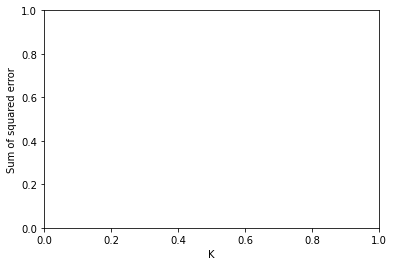

In [27]:
plt.xlabel('K') 
plt.ylabel('Sum of squared error') 
plt.plot(k_rng,sse)

In [32]:
#DBSCAN

dbsc = cluster.DBSCAN(eps = .5, min_samples = 15).fit(Df_final)
print(dbsc.labels_)
    

print(y_pred)
# We store the K-means results in a dataframe
pred = pd.DataFrame(y_pred)
pred.columns = ['Type']

print(pred)
# we merge this dataframe with df
prediction = pd.concat([Df_final, pred], axis = 1)
print(prediction)

# We store the clusters
clus0 = prediction.loc[prediction.Type == 0]
clus1 = prediction.loc[prediction.Type == 1]
#clus2 = prediction.loc[prediction.Type == 2]
cluster_list = [clus0.values, clus1.values] 
print(dunn(cluster_list))

[0 0 0 ... 0 0 0]
[0 0 2 ... 0 0 0]
       Type
0         0
1         0
2         2
3         1
4         0
...     ...
10828     0
10829     0
10830     0
10831     0
10832     0

[10833 rows x 1 columns]
                  0    1    2             3    4    5    6    7    8    9  \
0      5.263157e-08  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
1      7.138306e-08  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
2      9.965299e-08  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
3      1.788841e-08  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
4      3.569153e-07  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
...             ...  ...  ...           ...  ...  ...  ...  ...  ...  ...   
10828  0.000000e+00  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
10829  0.000000e+00  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
10830  0.000000e+00  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
10831  0.000000e+00  0.0

In [31]:
#DBSCAN
from sklearn import cluster

dbsc = cluster.DBSCAN(eps = .005, min_samples = 15).fit(Df_final)
labels=pd.DataFrame(dbsc.labels_)
labels_New=dbsc.labels_
labels.columns = ['Type']

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_New)) - (1 if -1 in labels_New else 0)
#n_clusters_ = 2
n_noise_ = list(labels_New).count(-1)
print('n_clusters : ',n_clusters_)
print(n_noise_)

#y_pred = dbsc.predict(Df_final)

# we merge this dataframe with df
prediction = pd.concat([Df_final, labels], axis = 1)

print(prediction)

# We store the clusters
cluster_list=[]

for i in range(n_clusters_):
    cluster_list.append(prediction.loc[prediction.Type == i].values)
    

print(dunn(cluster_list))

n_clusters :  24
1175
                  0    1    2             3    4    5    6    7    8    9  \
0      5.263157e-08  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
1      7.138306e-08  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
2      9.965299e-08  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
3      1.788841e-08  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
4      3.569153e-07  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
...             ...  ...  ...           ...  ...  ...  ...  ...  ...  ...   
10828  0.000000e+00  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
10829  0.000000e+00  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
10830  0.000000e+00  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   
10831  0.000000e+00  0.0  0.0  1.041667e-07  0.0  0.0  0.0  0.0  0.0  0.0   
10832  0.000000e+00  0.0  0.0  0.000000e+00  0.0  0.0  0.0  0.0  0.0  0.0   

       ...           152           153       154     